# Четвёртая лабораторная работа

In [2]:
import thinkdsp as td
import numpy as np

## Задание 1. 
Загрузить звуки природы. Определить вид их шумов.

Шум горящего костра.

In [9]:
filename_fire = "wavs/187079__samararaine__nighttime-bonfire-2.wav"
fire = td.read_wave(filename_fire).segment(5, 5)

In [10]:
fire.make_audio()

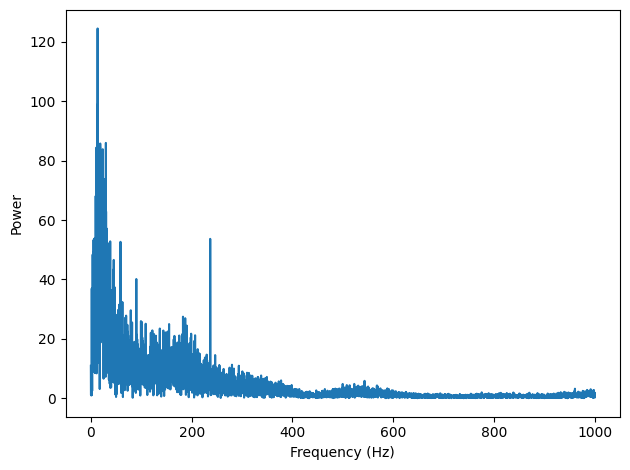

In [11]:
fire.make_spectrum().plot(high=1000)
td.decorate(xlabel="Frequency (Hz)", ylabel="Power")

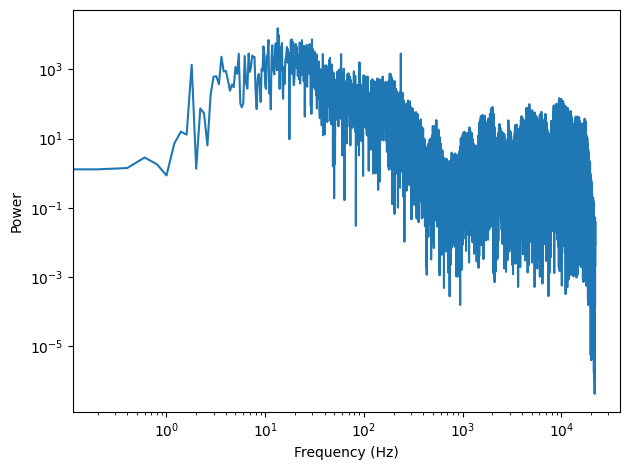

In [12]:
fire.make_spectrum().plot_power()
loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

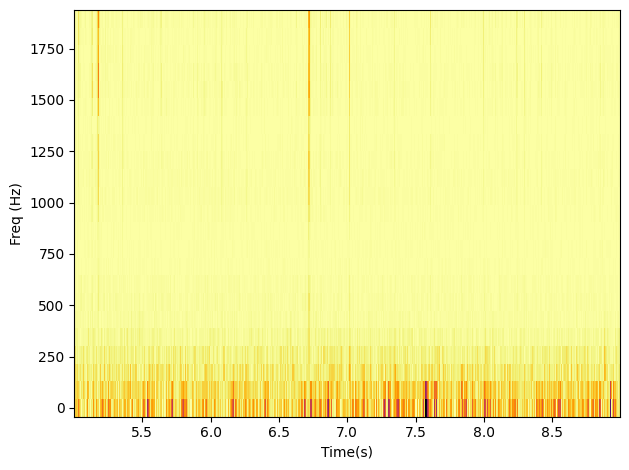

In [78]:
fire.make_spectrogram(512).plot(high=2000)
td.decorate(xlabel='Time(s)', ylabel='Freq (Hz)')

С уменьшением частоты резко понижается амплитуда. Можно судить, что запись больше всего напоминает розовый шум.
Далее - шум дождя.

In [79]:
filename_rain = "wavs/531947__straget__the-rain-falls-against-the-parasol.wav"
rain = td.read_wave(filename_rain).segment(5, 5)
rain.make_audio()

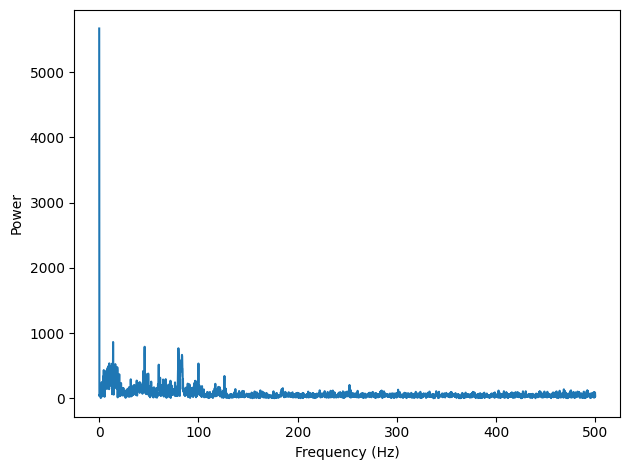

In [80]:
rain.make_spectrum().plot(high=500)
td.decorate(xlabel="Frequency (Hz)", ylabel="Power")

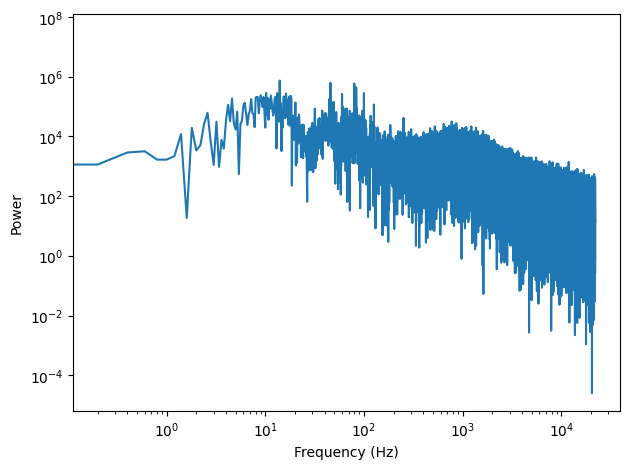

In [81]:
rain.make_spectrum().plot_power()
loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

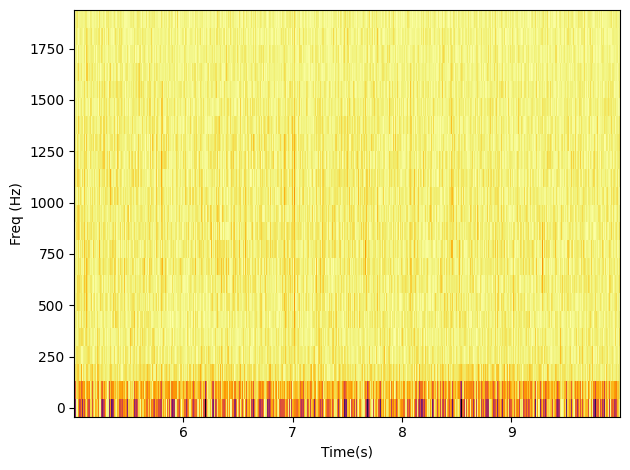

In [82]:
rain.make_spectrogram(512).plot(high=2000)
td.decorate(xlabel='Time(s)', ylabel='Freq (Hz)')

Также выглядит как розовый шум.

## Задание 2. 
Реализовать метод Барлетта. 

In [96]:
def bartlett(wave, seg_length=512, win_flag=True):
    spectrogram = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectrogram.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    return td.Spectrum(hs, fs, wave.framerate)

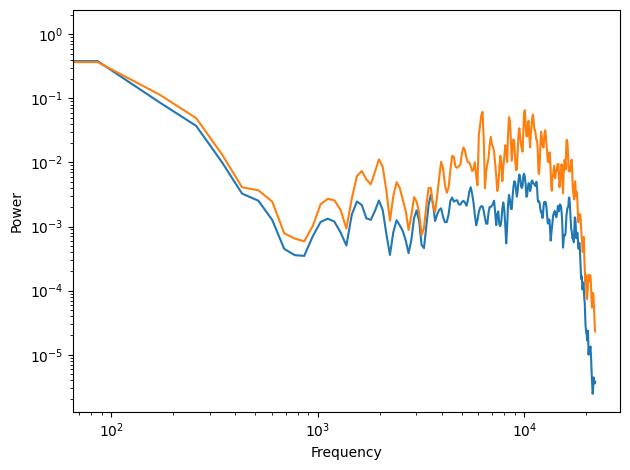

In [97]:
filename_fire = "wavs/187079__samararaine__nighttime-bonfire-2.wav"
fire = td.read_wave(filename_fire)

bartlett(fire.segment(0, 2)).plot_power()
bartlett(fire.segment(2, 2)).plot_power()

loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency',
         ylabel='Power', 
         **loglog)

Средние значения частоты на соседних сегментах схожи.

## Задание 3. 
Скачать дневное изменение цены БитКоина. Определить спектр цены как функцию от времени. Определить вид шума.

In [98]:
import pandas as pd
bitcoin_info = pd.read_csv('wavs/Bitcoin_Price.csv')

Информация с 2013-10 по 2021-01

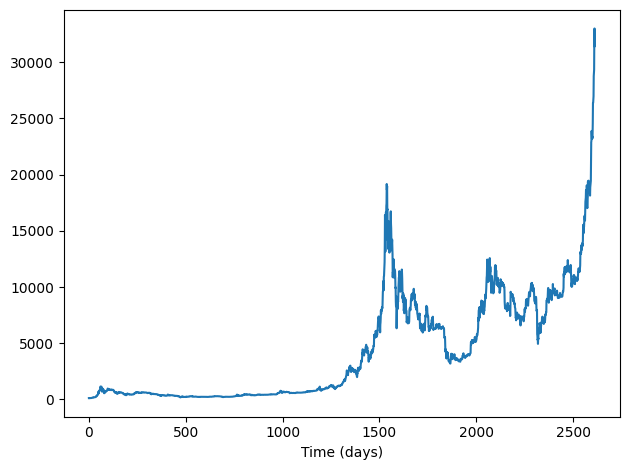

In [99]:
bitcoin_wave = td.Wave(ys=bitcoin_info['Closing Price (USD)'], ts=bitcoin_info.index, framerate=1)
bitcoin_wave.plot()
td.decorate(xlabel='Time (days)')

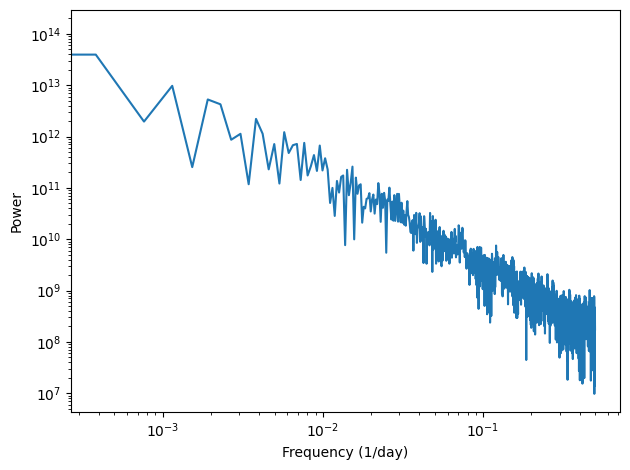

In [100]:
bitcoin_wave.make_spectrum().plot_power()
loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency (1/day)',
         ylabel='Power', 
         **loglog)

In [101]:
bitcoin_wave.make_spectrum().estimate_slope().slope

-1.773994413215145

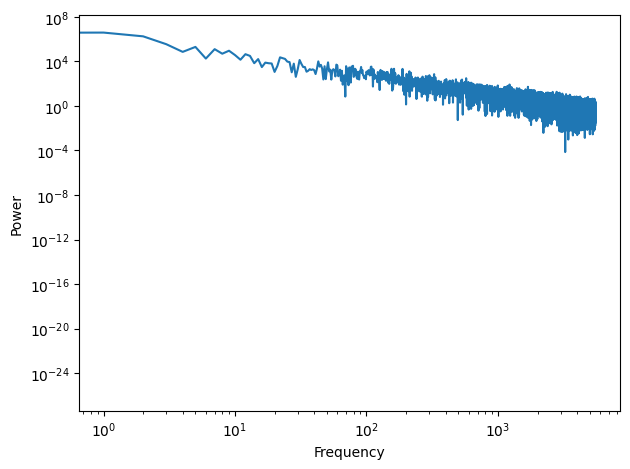

In [102]:
td.PinkNoise(
    beta=-bitcoin_wave.make_spectrum().estimate_slope()[0]
).make_wave().make_spectrum().plot_power()
loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency',
         ylabel='Power', 
         **loglog)

Курс биткоина имеет вид розового шума с параметром Beta = 1.7739.

## Задание 4. 
Описать класс UncorrrelatedPoissonNoise. Сгенерировать сигнал UP шума, получить сп

In [103]:
class UncorrelatedPoissonNoise(td.Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [104]:
geiger = UncorrelatedPoissonNoise(amp=0.001).make_wave(duration=5, framerate=10000)
geiger.make_audio()

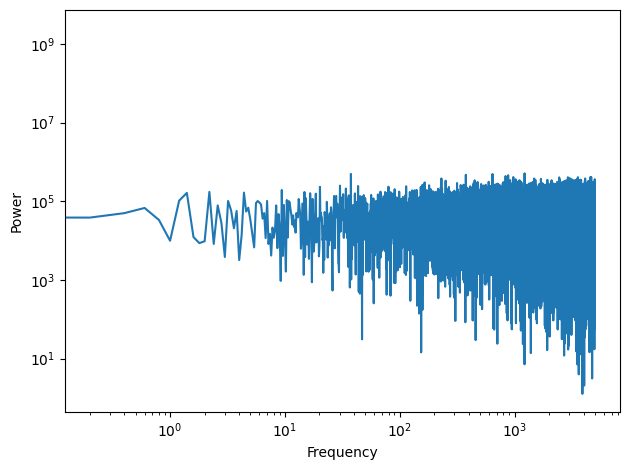

In [105]:
UP = UncorrelatedPoissonNoise(amp=1).make_wave(duration=5, framerate=10000)
UP.make_spectrum().plot_power()
loglog = dict(xscale='log', yscale='log')
td.decorate(xlabel='Frequency',
         ylabel='Power', 
         **loglog)
UP.make_audio()

Действительно похоже на белый шум.

## Задание 5. 
Оптимизировать метод генерации розового шума.

In [106]:
def voss(nrows, ncols=16):
    matrix = np.empty((nrows, ncols))
    matrix.fill(np.nan)
    matrix[0, :] = np.random.random(ncols)
    matrix[:, 0] = np.random.random(nrows)
    
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    matrix[rows, cols] = np.random.random(n)

    df = pd.DataFrame(matrix)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

Идея алгоритма заключается в суммировании последовательностей случайных чисел, у которых убывает частота дискретизации в два раза с каждой новой последовательностью. 

In [107]:
ys = voss(10000)
wave = td.Wave(ys=ys, framerate=10000)
wave.unbias()
wave.normalize()
wave.make_audio()

C:\Users\alutc\AppData\Local\Temp\ipykernel_24544\3826397305.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


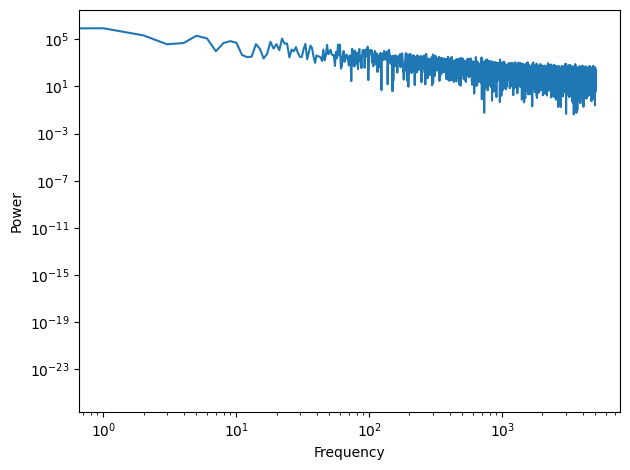

In [108]:
wave.make_spectrum().plot_power()
td.decorate(xlabel='Frequency',
         ylabel='Power', 
         **loglog)

In [109]:
wave.make_spectrum().estimate_slope().slope

-0.9731136632857461